<hr style = "height: 10px; border: 1; box-shadow: inset 0 9px 9px -3px rgba(250, 128, 114, 0.8); -webkit-border-radius: 5px;
-moz-border-radius: 5px; -ms-border-radius: 5px; -o-border-radius: 5px; border-radius: 5px">
### Table of Contents <a class="anchor" id="t_tests_toc"></a>

* [Table of Contents](#t_tests_toc)
    * [Page 1 - Single Sample t test](#t_tests_page_1)
    * [Page 2 - Independent t test](#t_tests_page_2)
    * [Page 3 -  Dependent t test](#t_tests_page_3)
    * [Page 4 - Independent Chi Squares](#t_tests_page_4)
    * [Page 5 - ](#t_tests_page_5)
    * [Page 6 - ](#t_tests_page_6)
    * [Page 7 - ](#t_tests_page_7)
    * [Page 8 - ](#t_tests_page_8)
    * [Page 9 - Quiz](#t_tests_page_9)
    
<hr style = "height: 10px; border: 1; box-shadow: inset 0 9px 9px -3px rgba(250, 128, 114, 0.8); -webkit-border-radius: 5px;
-moz-border-radius: 5px; -ms-border-radius: 5px; -o-border-radius: 5px; border-radius: 5px">

<hr style = "height: 10px; border: 1; box-shadow: inset 0 9px 9px -3px rgba(11, 99, 184, 0.8); -webkit-border-radius: 5px;
-moz-border-radius: 5px; -ms-border-radius: 5px; -o-border-radius: 5px; border-radius: 5px">
# Page 1 - Introduction <a class="anchor" id="t_tests_page_1"></a>

[Back to Top](#t_tests_toc)

<hr style = "height: 10px; border: 1; box-shadow: inset 0 9px 9px -3px rgba(11, 99, 184, 0.8); -webkit-border-radius: 5px;
-moz-border-radius: 5px; -ms-border-radius: 5px; -o-border-radius: 5px; border-radius: 5px">

Using a single sample t test to determine whether a cost of $25,000 for a hybrid vehicle in 2013 is different than the mean cost.

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import norm
from scipy import stats

In [3]:
hybrid = pd.read_excel("DATA/hybrid2013.xlsx")

In [4]:
hybrid.head()

,carid,vehicle,year,msrp,accelrate,mpg,mpgmpge,carclass,carclass_id
0,111,Prius C,2013,19080,8.70,50,50,C,1
1,112,Jetta,2013,24995,12.66,45,45,C,1
2,113,Civic,2013,24360,10.20,44,44,C,1
3,114,Prius,2013,24200,10.20,50,50,M,3
4,115,Fusion FWD,2013,27200,11.72,47,47,M,3


The only assumption for the single sample t test is that the data is normally distributed. You can test this just by creating a histogram:

<AxesSubplot:>

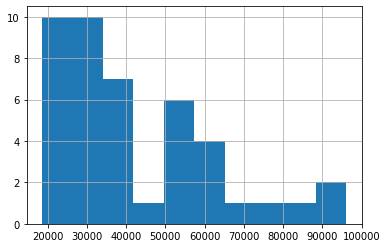

In [7]:
hybrid.msrp.hist()

I do prefer a fitted curve, which Seaborn has available:

C:\Python3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='msrp', ylabel='Density'>

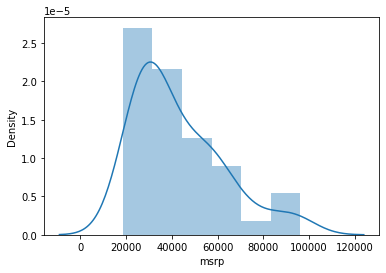

In [12]:
sns.distplot(hybrid.msrp)

It is still positively skewed, and somewhat bimodal as well, but we can try to fix this by taking the square root of the data.

In [14]:
hybrid['msrpSQRT'] = np.sqrt(hybrid['msrp'])

C:\Python3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='msrpSQRT', ylabel='Density'>

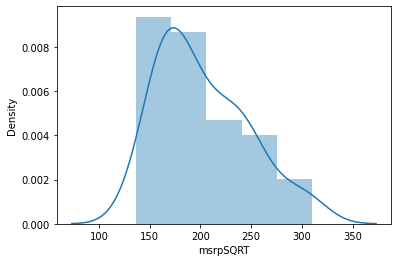

In [15]:
sns.distplot(hybrid['msrpSQRT'])

In [16]:
#That didn't do much -  trying LOG 
hybrid['msrpLOG'] = np.log(hybrid['msrp'])

C:\Python3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='msrpLOG', ylabel='Density'>

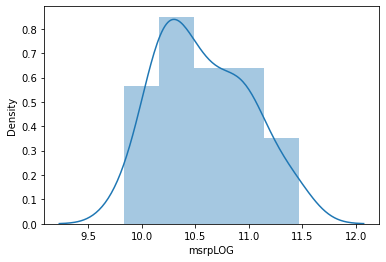

In [18]:
sns.distplot(hybrid['msrpLOG'])

Ok, that's better, anyway. On to the single sample t test, which determines if one value is different than the mean of the population, which in this case is $25,000.

In [20]:
stats.ttest_1samp(hybrid['msrp'], 25000)

Ttest_1sampResult(statistic=6.003733172775179, pvalue=3.923180751883552e-07)

With a threshold set at .05, this is significant at p < .05. That means that buying a hybrid car for $25,000 in 2013 is different than the population mean. Is it higher or lower? To answer that question, you will need to examine the population mean:

In [19]:
hybrid.msrp.mean()

42943.48837209302

With an average cost, or population mean of just under 43,000 dollars, buying one for $25,000 would have been a great deal. 

Now, to determine whether a miles per gallon (mpg) rating of 40 is unusual for a hybrid car on the market in 2013. To do this, you will need to test for the assumption of normality by creating a histogram, and then run a single sample ttest, as before. 

<AxesSubplot:>

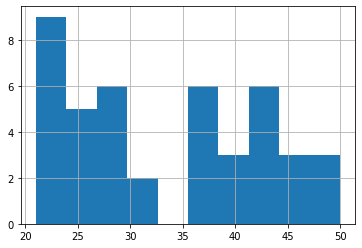

In [21]:
hybrid.mpg.hist()

C:\Python3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='mpg', ylabel='Density'>

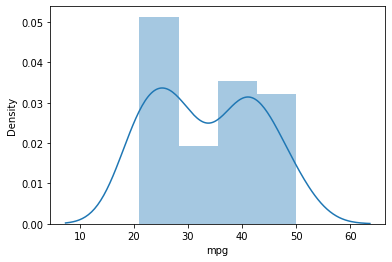

In [23]:
sns.distplot(hybrid['mpg'])

In [26]:
hybrid['mpgSQRT'] = np.sqrt(hybrid['mpg'])

<AxesSubplot:>

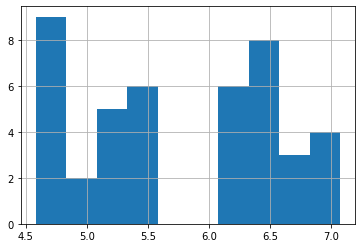

In [27]:
hybrid['mpgSQRT'].hist()

I just wanted to illustrate that taking the square root or logarithm of a bimodal distribution doesn't change a thing, so we'll go with mpg column as-is.  Forty mpg is the population average. 

In [28]:
stats.ttest_1samp(hybrid['mpg'], 40)

Ttest_1sampResult(statistic=-4.427320491687408, pvalue=6.67005084670698e-05)

With a threshold set at .05, this is not significant at p > .05. That means that the miles per gallon for a hybrid car in 2013 is not significantly different than the population mean. Is it any higher or lower at all? To answer that question, we will need to examine the population mean:

In [29]:
hybrid.mpg.mean()

33.48837209302326

Every mile counts, though, right?

<hr style = "height: 10px; border: 1; box-shadow: inset 0 9px 9px -3px rgba(250, 128, 114, 0.8); -webkit-border-radius: 5px;
-moz-border-radius: 5px; -ms-border-radius: 5px; -o-border-radius: 5px; border-radius: 5px">

# Page 2 - Independent t tests <a class="anchor" id="t_tests_page_2"></a>

[Back to Top](#t_tests_toc)

<hr style = "height: 10px; border: 1; box-shadow: inset 0 9px 9px -3px rgba(250, 128, 114, 0.8); -webkit-border-radius: 5px;
-moz-border-radius: 5px; -ms-border-radius: 5px; -o-border-radius: 5px; border-radius: 5px">

## Independendent t tests

An independent t test is used when you have one independent variable that is categorical and a grouping variable, and one dependent continuous variable. Use an independent t-test when you want to determine whether the means of two different, unrelated groups are the same or different.

In [31]:
from scipy.stats import ttest_ind

## Test Assumptions 

The only assumption that independent *t* has is normality.  You will need to test normality for each of your groups - compact and mid-sized hybrid cars.  

This code is very similar to before, but has an extra layer of specifying which values from the ```carclass``` you want to examine: 

<AxesSubplot:>

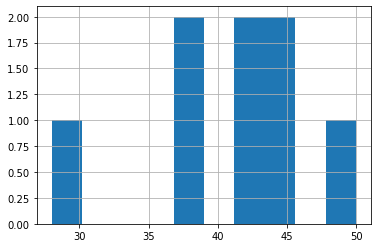

In [33]:
hybrid.mpg[hybrid.carclass == 'C'].hist()


<AxesSubplot:>

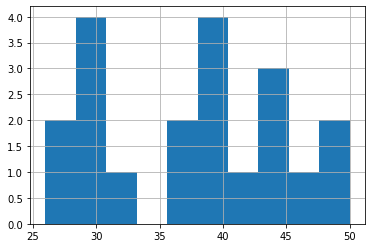

In [34]:
# Same thing for the mid-size hybrid cars:

 
hybrid.mpg[hybrid.carclass == 'M'].hist()
# This time, we are testing to see whether compact and mid-size hybrid cars differ in their average miles per gallon.

Neither of these are normally distributed, but we'll continue for the sake of the example. 

In [35]:
ttest_ind(hybrid.mpg[hybrid.carclass == 'C'], hybrid.mpg[hybrid.carclass == 'M'])

Ttest_indResult(statistic=1.0751886097093057, pvalue=0.29216712457079796)

The p value > .05, which means there is no significant difference between mid and compact size cars in terms of mpg. The t statistic is pretty small as well - another good indication. 

Now, let's run an independent t-test to see if the miles per gallon differ between compact (C) and large (L) cars. I'm skipping the histogram, since I would run the t test regardless. 

In [36]:
ttest_ind(hybrid.mpg[hybrid.carclass == 'C'], hybrid.mpg[hybrid.carclass == 'L'])

Ttest_indResult(statistic=2.598820461640718, pvalue=0.026545168887970098)

Since the p value here is < .05, and the t statistic is larger, as well, we can conclude that there is a difference in the mph of large and compact hybrid cars. 

It seems an obvious assumption, but let's compare the means of each class of cars to see exactly what the difference is between them. 

In [44]:
hybrid.mpg[hybrid.carclass == 'C'].mean()



40.75

In [45]:
hybrid.mpg[hybrid.carclass == 'L'].mean()

28.5

In [46]:
40.75 - 28.5


12.25

We see that compact hybrid cars get 12.25 additional miles to the gallon over large hybrid cars in 2013.

<hr style = "height: 10px; border: 1; box-shadow: inset 0 9px 9px -3px rgba(11, 99, 184, 0.8); -webkit-border-radius: 5px;
-moz-border-radius: 5px; -ms-border-radius: 5px; -o-border-radius: 5px; border-radius: 5px">
# Page 3 - Dependent t tests <a class="anchor" id="t_tests_page_3"></a>

[Back to Top](#t_tests_toc)

<hr style = "height: 10px; border: 1; box-shadow: inset 0 9px 9px -3px rgba(11, 99, 184, 0.8); -webkit-border-radius: 5px;
-moz-border-radius: 5px; -ms-border-radius: 5px; -o-border-radius: 5px; border-radius: 5px">

<hr style = "height: 10px; border: 1; box-shadow: inset 0 9px 9px -3px rgba(11, 99, 184, 0.8); -webkit-border-radius: 5px;
-moz-border-radius: 5px; -ms-border-radius: 5px; -o-border-radius: 5px; border-radius: 5px">

[link for creative banners](https://www.formget.com/css-hr/)



## Dependent t tests

Dependent t-tests are used when your samples are related in some way, but you still want to see if the means change. It may be change over time, or change with treatment, etc. A dependent t requires an independent variable that is categorical (groups to compare) and a dependent variable that is continuous.  "Before and after" type experiments are perfectly suited for dependent t tests. 

In [49]:
hybrid2 = pd.read_excel("DATA/hybrid2012-13.xlsx")

In [50]:
hybrid2.head()

,vehicle,msrp2012,accelrate2012,mpg2012,mpgmpge2012,carclass2012,carclass_id2012,msrp2013,accelrate2013,mpg2013,mpgmpge2013,carclass2013,carclass_id2013
0,ActiveHybrid 3,19006.62,9.35,50,50,C,1,19080,8.70,50,50,C,1
1,ActiveHybrid 5,32095.61,8.82,50,95,M,3,24995,12.66,45,45,C,1
2,Ampera,31739.55,11.11,37,98,C,1,24200,10.20,50,50,M,3
3,Camry LE,62180.23,16.67,26,26,M,3,18600,11.76,42,42,C,1
4,Chevrolet Volt,59126.14,16.95,31,31,M,3,69850,16.39,21,21,SUV,6


only assumption is normality - with a histogram

<AxesSubplot:>

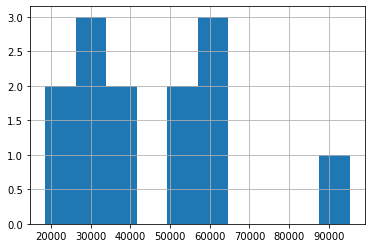

In [51]:
hybrid2['msrp2012'].hist()

<AxesSubplot:>

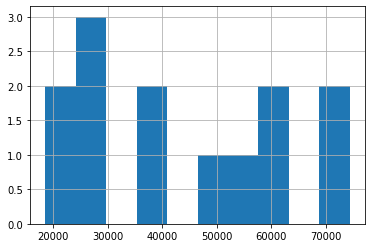

In [52]:
hybrid2['msrp2013'].hist()

It's fine - we'll proceed. The only two arguments for this function are the two columns we'll compare. Think of _rel as related.

In [53]:
stats.ttest_rel(hybrid2['msrp2012'], hybrid2['msrp2013'])

Ttest_relResult(statistic=0.23749650777597428, pvalue=0.8162780348473798)

Since the p value is > .05, this means there was no significant change in prices over the two years. 

Next, let's take a look and see with a dependent t-test to see if the miles per gallon changes between 2012 and 2013.

<AxesSubplot:>

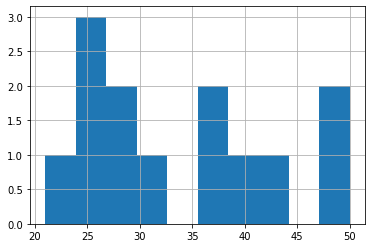

In [55]:
hybrid2['mpg2012'].hist()

<AxesSubplot:>

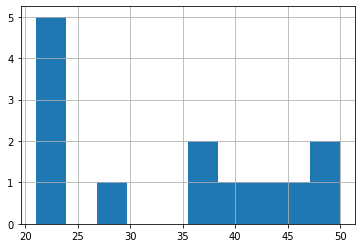

In [56]:
hybrid2['mpg2013'].hist()

In [57]:
stats.ttest_rel(hybrid2['mpg2012'], hybrid2['mpg2013'])

Ttest_relResult(statistic=0.14466598084438312, pvalue=0.8873759030512349)

Since the p value is > .05, and the t value is very small, this means there is no significant difference between miles per gallon over the two model years for this car. 

<hr style = "height: 10px; border: 1; box-shadow: inset 0 9px 9px -3px rgba(11, 99, 184, 0.8); -webkit-border-radius: 5px;
-moz-border-radius: 5px; -ms-border-radius: 5px; -o-border-radius: 5px; border-radius: 5px">
# Page 4 - Independent Chi Squares <a class="anchor" id="t_tests_page_4"></a>

[Back to Top](#t_tests_toc)

<hr style = "height: 10px; border: 1; box-shadow: inset 0 9px 9px -3px rgba(11, 99, 184, 0.8); -webkit-border-radius: 5px;
-moz-border-radius: 5px; -ms-border-radius: 5px; -o-border-radius: 5px; border-radius: 5px">

An independent Chi-Square is used when you want to determine whether two categorical variables influence each other

In [58]:
lipstick = pd.read_csv("DATA/lead_lipstick.csv")

In [59]:
lipstick.head()

,JRC_code,purchCntry,prodCntry,Pb,sdPb,shade,prodType,priceCatgry
0,C135,NL,NL,3.75,0.24,Red,LP,2
1,C18,FI,FI,2.29,0.07,Red,LP,2
2,C20,FI,IT,1.27,0.06,Red,LP,2
3,C164,DE,FR,1.21,0.06,Red,LP,2
4,C71,MT,UK,0.85,0.04,Red,LP,2


This dataset has some code to interpret, the first is product type, prodType and it has two levels: LP is lipstick, and LG is lip gloss. The second is price category, priceCatgry, and it has three levels: